# Lecture 4
# Numpy and Numpy arrays

## What is NumPy 

Python objects:	
- high-level number objects: integers, floating point
- containers: lists (costless insertion and append), dictionaries (fast lookup)

NumPy provides:	
- extension package to Python for multi-dimensional arrays
- closer to hardware (efficiency)
- designed for scientific computation (convenience)
- Also known as array oriented computing

In [2]:
import numpy as np
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

For example, an array containing:
- values of an experiment/simulation at discrete steps
- signal recorded by a measurement device e.g. sound wave
- pixels of an image, grey-scale or colour
- 3-D data measured at different x,y,z positions, e.g. MRI scan
- ...

**Why it is useful:** Memory-efficient container that provides fast numerical operations.

In [3]:
L = range(1000)
%timeit [i**2 for i in L]

444 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
a = np.arange(1000)
%timeit a**2

2.23 µs ± 53 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### NumPy Reference documentation

- On the web: http://docs.scipy.org/
- Interactive help:

In [5]:
np.array?

- Looking for something:

In [6]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new_

In [7]:
np.con*?

### Import conventions

The recommended convention to import numpy is:

In [8]:
import numpy as np

## Creating arrays

### Manual construction of arrays

- 1-D:

In [9]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [10]:
a.ndim

1

In [11]:
a.shape

(4,)

In [12]:
len(a)

4

- 2-D, 3-D, …:

In [13]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [14]:
b.ndim

2

In [15]:
b.shape

(2, 3)

In [16]:
len(b)     # returns the size of the first dimension

2

In [17]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [18]:
c.shape

(2, 2, 1)

### Functions for creating arrays

In practice, we rarely enter items one by one…
- Evenly spaced:

In [19]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

- or by number of points:

In [21]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [22]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Common arrays:

In [23]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [25]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

- `np.random`: random numbers (Mersenne Twister PRNG):

In [27]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

array([0.85052241, 0.43729945, 0.90491165, 0.20145483])

In [28]:
b = np.random.randn(4)      # Gaussian
b  

array([-0.33028862, -0.75327524,  1.36981244, -0.4968162 ])

In [29]:
np.random.seed(1234)        # Setting the random seed

## Basic data types

You may have noticed that, in some instances, array elements are displayed with a trailing dot (e.g. 2. vs 2). This is due to a difference in the data-type used:

In [30]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [31]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Different data-types allow us to store data more compactly in memory, but most of the time we simply work with floating point numbers. Note that, in the example above, NumPy auto-detects the data-type from the input.

You can explicitly specify which data-type you want:

In [32]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

The **default** data type is floating point:

In [33]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

There are also other types:

**Complex:**	

In [34]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

**Bool:**

In [35]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

**Strings:**

In [36]:
f = np.array(['Bonjour', 'Hello', 'Hallo'])
f.dtype     # <--- strings containing max. 7 letters  

dtype('<U7')

**Much more:**
- int32
- int64
- uint32
- uint64

## Basic visualization

Now that we have our first data arrays, we are going to visualize them.

Start by launching IPython:
    
```bash
$ ipython # or ipython3 depending on your install
```

Or the notebook:

```bash
$ jupyter notebook
```

Once IPython has started, enable interactive plots:

```python
%matplotlib 
```

Or, from the notebook, enable plots in the notebook:

In [37]:
%matplotlib inline 

The inline is important for the notebook, so that plots are displayed in the notebook and not in a new window.

Matplotlib is a 2D plotting package. We can import its functions as below:

In [38]:
import matplotlib.pyplot as plt  # the tidy way

- **1D plotting:**

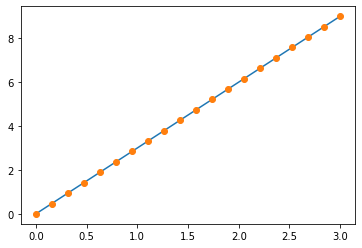

In [39]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot 
plt.plot(x, y, 'o')  # dot plot
plt.show()

- **2D arrays** (such as images):

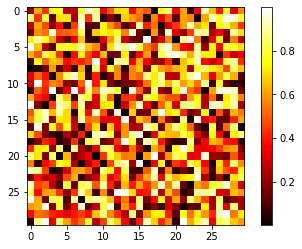

In [40]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot) 
plt.colorbar() 
plt.show()

## Indexing and slicing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [41]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
a[0], a[2], a[-1]

(0, 2, 9)

Indices begin at 0, like other Python sequences (and C/C++). In contrast, in Fortran or Matlab, indices begin at 1.
The usual python idiom for reversing a sequence is supported:

In [43]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For multidimensional arrays, indexes are tuples of integers:

In [44]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [45]:
a[1, 1]

1

In [46]:
a[2, 1] = 10 # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [47]:
a[1]

array([0, 1, 0])

**Note**
- In 2D, the first dimension corresponds to rows, the second to columns.
- for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.

**Slicing:** Arrays, like other Python sequences can also be sliced:

In [48]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Note that the last index is not included! :

In [50]:
a[:4]

array([0, 1, 2, 3])

All three slice components are not required: by default, start is 0, end is the last and step is 1:

In [51]:
a[1:3]

array([1, 2])

In [52]:
a[::2]

array([0, 2, 4, 6, 8])

In [53]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

A small illustrated summary of NumPy indexing and slicing…

![](figs/numpy_indexing.png)

You can also combine assignment and slicing:

In [54]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [55]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

### Worked example: Prime number sieve

![](figs/prime-sieve.png)

Compute prime numbers in 0–99, with a sieve

Construct a shape `(100,)` boolean array `is_prime`, filled with `True` in the beginning:

In [63]:
is_prime = np.ones((100,), dtype=bool)

Cross out 0 and 1 which are not primes:

In [64]:
is_prime[:2] = 0

For each integer j starting from 2, cross out its higher multiples:

In [65]:
N_max = int(np.sqrt(len(is_prime) - 1))
for j in range(2, N_max + 1):
    is_prime[2*j::j] = False

Skim through help(np.nonzero), and print the prime numbers

In [66]:
np.nonzero(is_prime)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

## Fancy indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (masks). This method is called fancy indexing.

Using boolean masks:

In [67]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [68]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [69]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Indexing with a mask can be very useful to assign a new value to a sub-array:

In [70]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

Indexing can be done with an array of integers, where the same index is repeated several time:

In [72]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

New values can be assigned with this kind of indexing:

In [73]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

The image below illustrates various fancy indexing applications

![](figs/numpy_fancy_indexing.png)

## Basic operations

With scalars:

In [76]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [77]:
2**a

array([ 2,  4,  8, 16])

All arithmetic operates elementwise. These operations are of course much faster than if you did them in pure python

Array multiplication is not matrix multiplication:

In [78]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Note: Matrix multiplication:

In [79]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

## Other operations

Comparisons:

In [89]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

Transcendental functions:

In [90]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

## Shape mismatches

In [91]:
a = np.arange(4)
a + np.array([1, 2])  

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

## Transposition:

In [92]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [93]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

The transposition is a view

As a result, the following code is wrong and will not make a matrix symmetric:

```python
a += a.T
```

It will work for small arrays (because of buffering) but fail for large one, in unpredictable ways.

## Basic reductions

Computing sums

In [80]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [81]:
x.sum()

10

Sum by rows and by columns:

In [82]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [83]:
x.sum(axis=0)   # columns (first dimension)

array([3, 3])

In [84]:
x.sum(axis=1)   # rows (second dimension)

array([2, 4])

### Other reductions

works the same way (and take axis=)

- Extrema: `min()`, `max()`, `argmin()`, `argmax()`
- Logical operations: `all()`, `any()`
    - Note Can be used for array comparisons: `np.all(a == b)`
- Statistics: `mean()`, `median()`, `std()`, 

... and many more (best to learn as you go).

## Broadcasting

Basic operations on `numpy` arrays (addition, etc.) are elementwise

This works on arrays of the same size.

**Nevertheless**, It’s also possible to do operations on arrays of different
sizes if NumPy can transform these arrays so that they all have
the same size: this conversion is called broadcasting.
The image below gives an example of *broadcasting*:

![](figs/numpy_broadcasting.png)

Let’s verify:

In [94]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [95]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

A useful trick:

In [85]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [86]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape

(4, 1)

In [87]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [88]:
a + b

array([[12,  2,  4,  6,  8],
       [22, 12, 14, 16, 18],
       [32, 22, 24, 26, 28],
       [42, 32, 34, 36, 38]])

Broadcasting seems a bit magical, but it is actually quite natural to use it when we want to solve a problem whose output data is an array with more dimensions than input data.

## Array shape manipulation

### Flattening

In [96]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [97]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [98]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out “first”.

### Reshaping

The inverse operation to flattening:

In [99]:
a.shape

(2, 3)

In [100]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

Or,

In [101]:
a.reshape((2, -1))    # unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

`ndarray.reshape` may return a view (cf `help(np.reshape))`), or copy. To understand this you need to learn more about the memory layout of a numpy array.

### Adding a dimension

Indexing with the `np.newaxis` object allows us to add an axis to an array (you have seen this already above in the broadcasting section):

In [102]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [103]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [104]:
z[np.newaxis, :]

array([[1, 2, 3]])

### Resizing

Size of an array can be changed with `ndarray.resize`:

In [ ]:
a = np.arange(4)
a.resize((8,))
a

## Summary

What do you need to know to get started?

- Know how to create arrays : `array`, `arange`, `ones`, `zeros`.

- Know the shape of the array with `array.shape`, then use slicing to obtain different views of the array: `array[::2]`, etc. Adjust the shape of the array using `reshape` or flatten it with `ravel`.

- Obtain a subset of the elements of an array and/or modify their values with masks (e.g. `a[a < 0] = 0`)
- Know miscellaneous operations on arrays, such as finding the `mean` or `max` (`array.max()`, `array.mean()`). No need to retain everything, but have the reflex to search in the documentation (online docs, `help()`, `lookfor()`)!!

- *For advanced use*: master the indexing with arrays of integers, as well as broadcasting. Know more NumPy functions to handle various array operations.